# Chapter 11: Credit Modeling

## Code segment 11.1
Table 11.2 in Section 11.2.2

In [4]:
#Code Segment 11.1
## Display financial metrics Table 11.2
## Source: Appendix A, median ratios
## https://www.moodys.com/research/Corporates-Global-Moodys-Financial-Metrics-key-ratios-by-rating-and--PBC_1261065
import pandas as pd
import numpy as np
metrics_filename="Moodys Key Metrics 2021.xlsx"

financial_metrics = pd.read_excel(metrics_filename, sheet_name='Financial Metrics', engine="openpyxl")

print("Table 11.2: Moody's Financial Metrics")
print("Key ratios by rating for global nonfinancial companies, 2021 update")
financial_metrics

Table 11.2: Moody's Financial Metrics
Key ratios by rating for global nonfinancial companies, 2021 update


,Item,Aaa,Aa,A,Baa,Ba,B,Caa-C
0,Debt/EBITDA,1.400,1.700,2.800,3.300,4.000,6.300,9.700
1,EBITDA/Interest Expense,48.400,25.400,10.200,5.800,3.600,1.700,0.600
2,Revenue,125.300,89.900,19.600,7.800,2.900,0.900,0.600
3,EBITDA Margin,0.374,0.180,0.127,0.131,0.128,0.120,0.063
4,Operating Margin,0.327,0.153,0.101,0.109,0.103,0.072,0.017
5,FFO/Debt,0.651,0.508,0.296,0.248,0.191,0.094,0.033
6,(FFO + IntExp) / IntExp,46.000,26.000,13.700,8.100,5.000,2.600,1.400
7,EBITA / Average Assets,0.193,0.117,0.068,0.068,0.072,0.059,0.033
8,CAPEX / Depreciation,1.700,1.200,1.200,1.200,1.100,1.000,0.900
9,Revenue Volatility,13.800,11.400,10.400,11.900,14.400,18.300,17.600


## Code segment 11.2
Figure 11.1 in Section 11.2.2

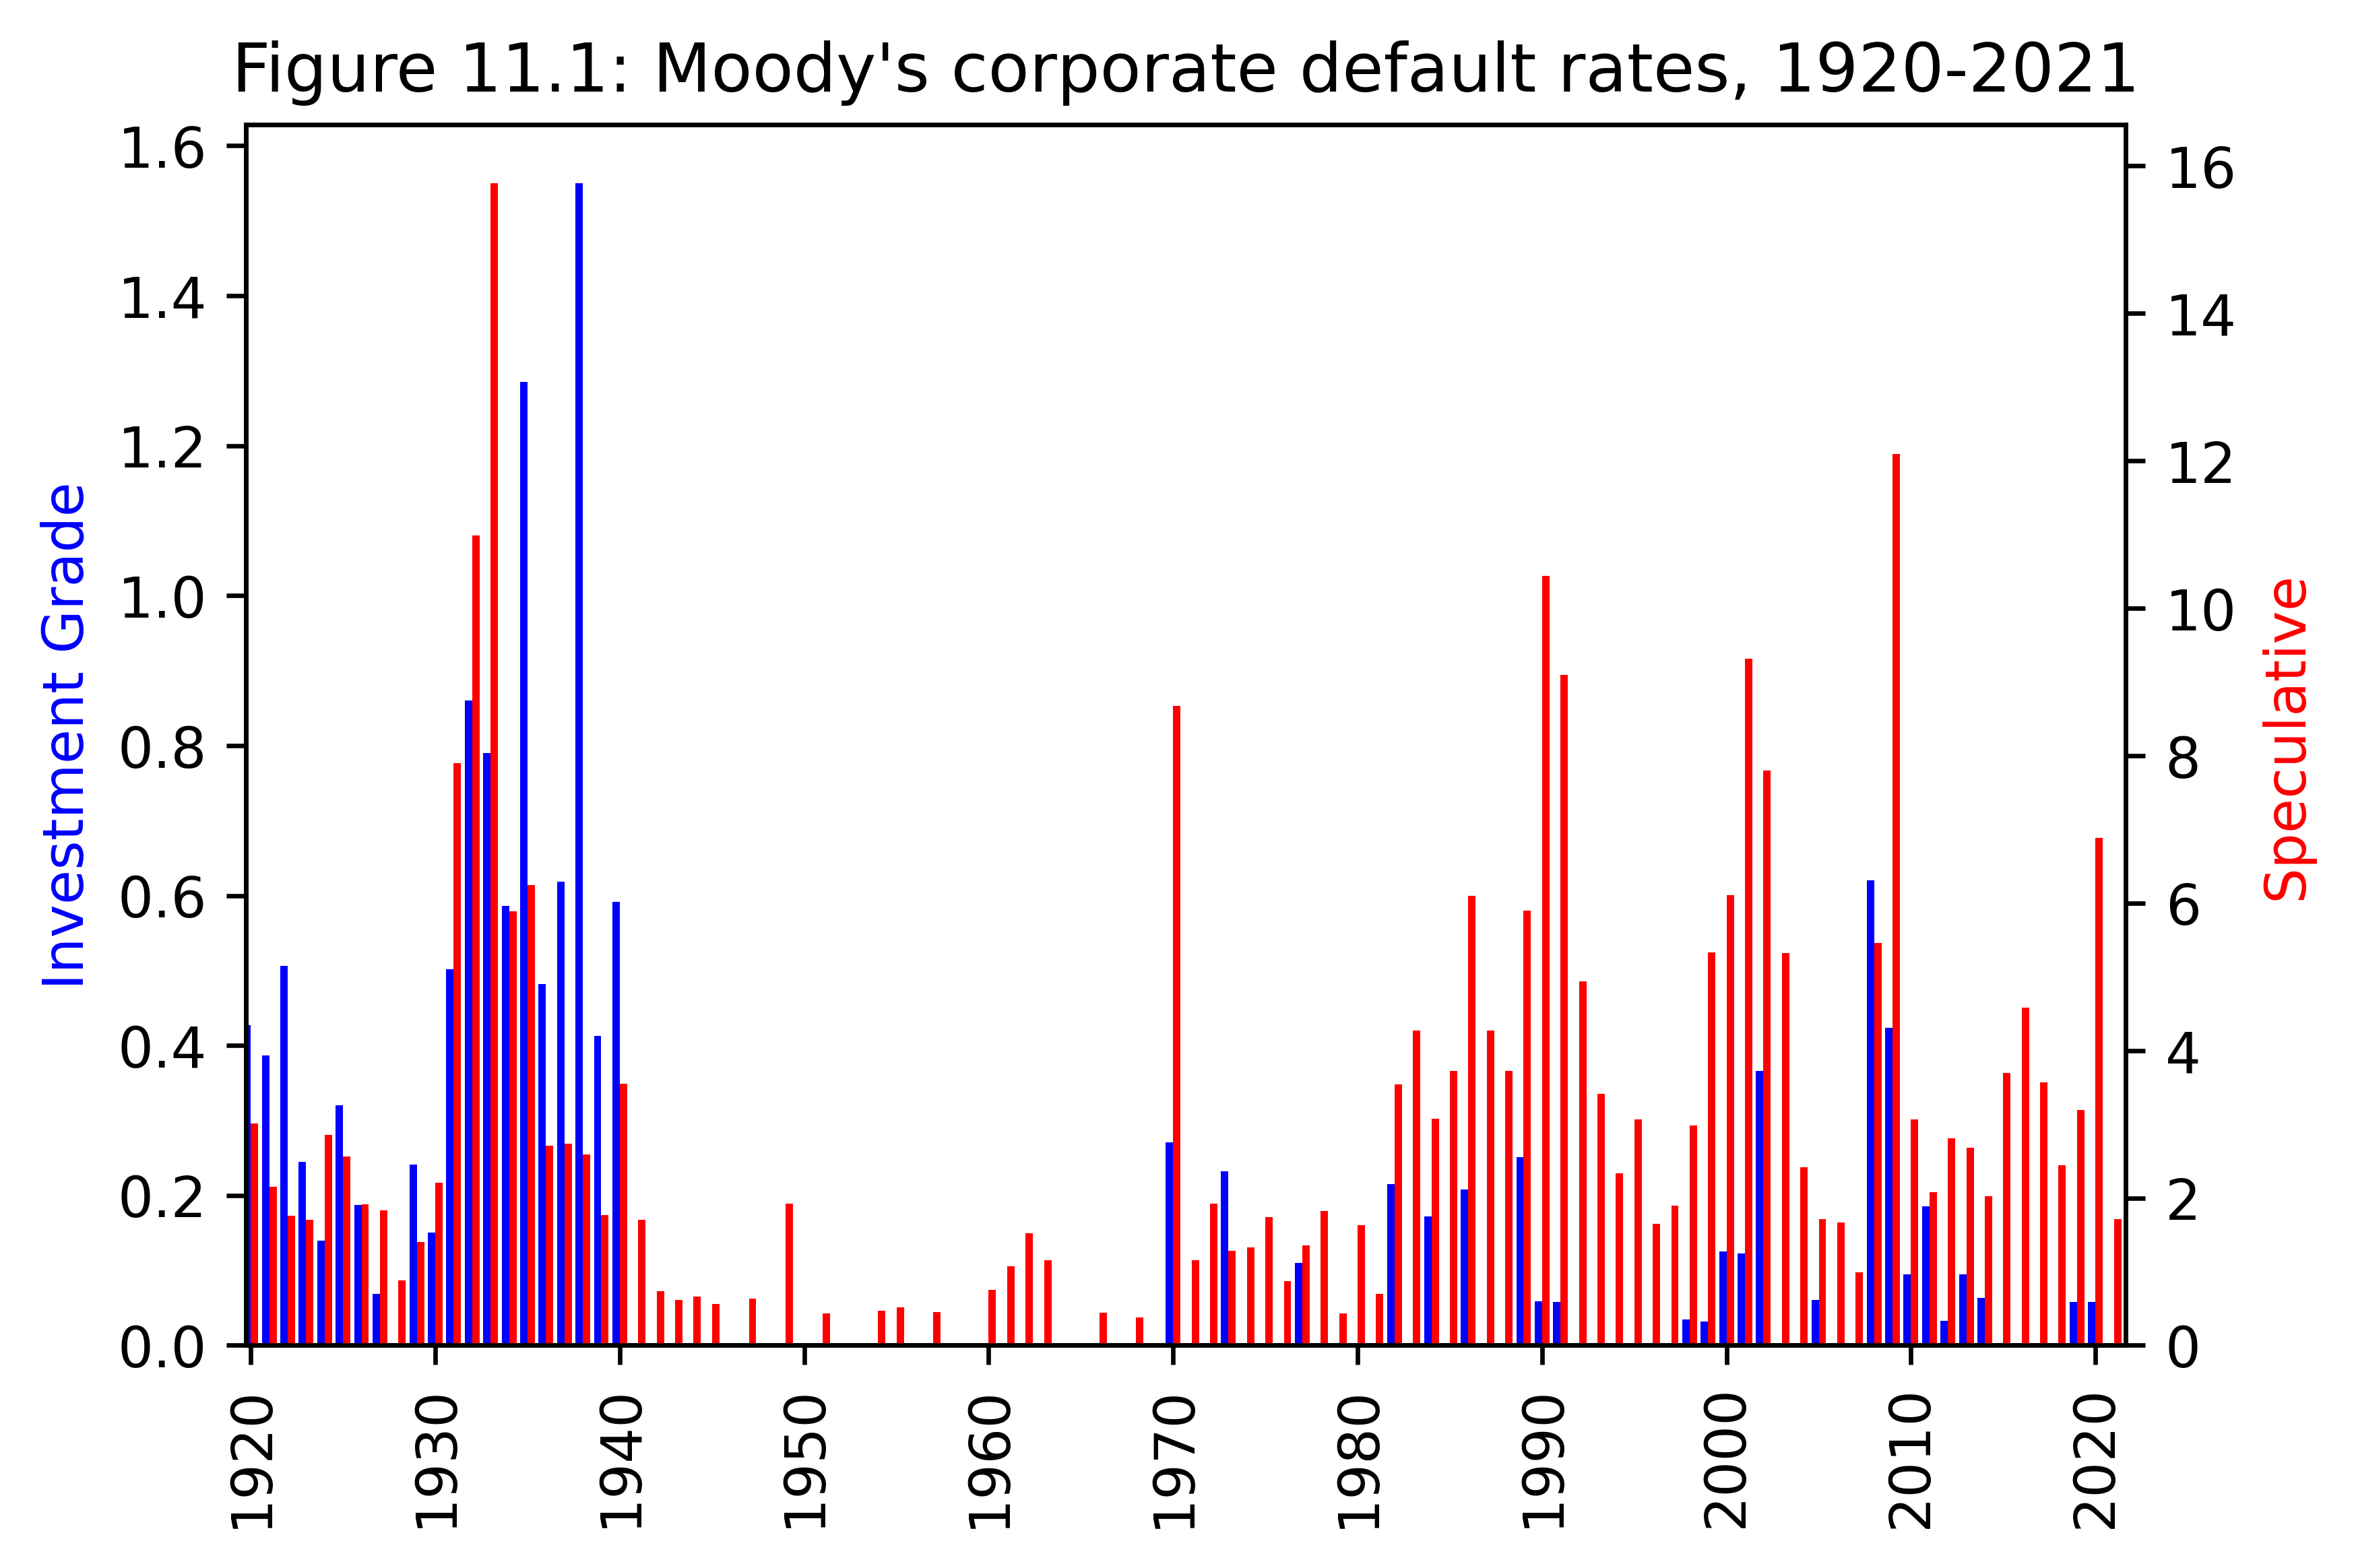

Investment grade:
    Min:  0.0
    Avg: 0.140. Since 1983: 0.080
    Max:  1.5503839897212  Year:  1938
    Percentage of years with no defaults:  56.86274509803921
Speculative:
    Min:  0.0
    Avg: 2.850. Since 1983: 4.303
    Max:  15.7695717129538  Year:  1933
    Percentage of years with no defaults:  11.764705882352942


In [5]:
#Code Segment 11.2
#Display bar charts with investment grade and speculative
#grade defaults year by year
#Data from Moody's Corporate Default and Recovery Rates, 1920-2021, Exhibit 37
#(File Default Reports - Annual-default-study-After-a-sharp-decline-in-2021-defaults-will-rise-modest... - 31Mar22.xlsx)
#Acquired from https://www.moodys.com/research/Annual-default-study-After-a-sharp-decline-in-2021-defaults--PBC_1323378
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi']= 300

moodys_default_filename='Default Reports - Annual-default-study-After-a-sharp-decline-in-2021-defaults-will-rise-modest... - 31Mar22.xlsx'
default_rates = pd.read_excel(moodys_default_filename, sheet_name='Ex37', skiprows=2, \
        usecols = ['Year', 'Aaa', 'Aa', 'A', 'Baa', 'Ba', 'B', 'Caa-C', 'IG', 'SG', 'All'], engine="openpyxl")

#Find number of actual years
n_years=default_rates.loc[default_rates['Year']=='Mean'].index.values[0]
#Lop off the summary information after years
default_rates.drop(np.arange(n_years,len(default_rates)),inplace=True)
#Change scale so that 1=1%
default_rates.IG=default_rates.IG.mul(100.)
default_rates.SG=default_rates.SG.mul(100.)

fig=plt.figure() # Create matplotlib figure

#Set up two axes because of different orders of
#magnitude between IG and HY
ax = fig.add_subplot(111)
ax2 = ax.twinx() # Create another axis that shares the same x-axis as ax.

width = 0.4

default_rates.IG.plot(kind='bar', color='blue', ax=ax, width=width, position=1)
default_rates.SG.plot(kind='bar', color='red', ax=ax2, width=width, position=0)

ax.set_ylabel('Investment Grade', color='blue')
ax2.set_ylabel('Speculative', color='red')

stride=10  #Label every decade
plt.xticks(range(0,n_years,stride),default_rates["Year"].iloc[::stride],rotation=45)

default_date_range="1920-"+str(default_rates['Year'].iloc[n_years-1])
plt.title("Figure 11.1: Moody's corporate default rates, "+default_date_range)
plt.show();

#Show averages, mins, maxes
print('Investment grade:')
print('    Min: ',min(default_rates.IG))
ig_default_rate_since_1983 = default_rates[default_rates.Year>=1983].IG.mean()
print('    Avg: %1.3f' % np.average(default_rates.IG) + ". Since 1983: %1.3f" \
    % ig_default_rate_since_1983)
print('    Max: ',max(default_rates.IG)," Year: ", \
      list(default_rates.loc[default_rates.IG==max(default_rates.IG)].Year)[0])
print('    Percentage of years with no defaults: ', \
      default_rates.IG.value_counts().iloc[0]*100./len(default_rates.IG))
print('Speculative:')
print('    Min: ',min(default_rates.SG))
sg_default_rate_since_1983 = default_rates[default_rates.Year>=1983].SG.mean()
print('    Avg: %1.3f' % np.average(default_rates.SG)+". Since 1983: %1.3f" \
      % sg_default_rate_since_1983)
print('    Max: ',max(default_rates.SG)," Year: ", \
      list(default_rates.loc[default_rates.SG==max(default_rates.SG)].Year)[0])
print('    Percentage of years with no defaults: ', \
      default_rates.SG.value_counts().iloc[0]*100./len(default_rates.SG))

## Code segment 11.3
Table 11.3 in Section 11.2.2

In [6]:
#Code Segment 11.3
#Produce Table 11.3
#Data from Moody's Corporate Default and Recovery Rates, 1920-2021, Exhibit 41
#Get restricted date range
date_range = pd.read_excel(moodys_default_filename, sheet_name='Ex41', nrows=2, engine="openpyxl") 
recent_date_range = date_range.columns[0][-9:]

#Get table and transpose it
cumulative_rates = pd.read_excel(moodys_default_filename, sheet_name='Ex41', skiprows=2, engine="openpyxl").transpose(copy=True)

idx_names = cumulative_rates.iloc[0]   #Put ratings in column names
cumulative_rates.rename(columns = idx_names, inplace = True)
cumulative_rates.index.rename(cumulative_rates.index[0],inplace = True)   #Put "Rating\Horizon as index name"
cumulative_rates.drop([idx_names.name], inplace = True)   #Drop redundant ratings labels

print("Table 11.3: Moody's Average Corporate Cumulative Default Rates\n"+ \
      "(Percents, 1.0=1%) By Letter Rating, "+recent_date_range)
pd.options.display.float_format="{:,.2f}".format
cumulative_rates*100.

Table 11.3: Moody's Average Corporate Cumulative Default Rates
(Percents, 1.0=1%) By Letter Rating, 1983-2021


,Aaa,Aa,A,Baa,Ba,B,Caa-C,IG,SG,All
Rating\Horizon,,,,,,,,,,
1,0.00,0.02,0.05,0.15,0.81,3.14,9.34,0.08,4.11,1.65
2,0.01,0.06,0.16,0.38,2.29,7.58,16.74,0.22,8.33,3.29
3,0.01,0.11,0.33,0.66,4.03,12.19,23.06,0.40,12.33,4.80
4,0.04,0.19,0.51,1.00,5.88,16.38,28.59,0.61,15.91,6.11
5,0.06,0.30,0.73,1.34,7.54,20.16,33.43,0.84,19.03,7.21
6,0.09,0.39,0.97,1.72,9.08,23.50,37.45,1.09,21.70,8.15
7,0.12,0.48,1.23,2.06,10.50,26.45,40.83,1.33,24.00,8.93
8,0.13,0.55,1.49,2.42,11.84,29.04,43.85,1.57,26.03,9.61
9,0.13,0.63,1.74,2.79,13.13,31.36,46.65,1.81,27.86,10.23


## Code segment 11.4
Table 11.4 in Section 11.2.2

In [7]:
#Code Segment 11.4
#Source: https://www.spglobal.com/ratings/en/research/
#articles/220413-default-transition-and-recovery-2021-
#annual-global-corporate-default-and-rating-transition-study-12336975

sandp_default_filename = "SandP global credit 2021.xlsx"

sandp_date_range = pd.read_excel(sandp_default_filename, sheet_name='Table 24', nrows=1, engine="openpyxl") 
sandp_recent_date_range = sandp_date_range.iloc[0][0][-10:-1]

#Get table
sandp_cumulative_rates = pd.read_excel(sandp_default_filename, sheet_name='Table 24', skiprows=2, engine="openpyxl")

#Display table
print("Table 11.4: Standard and Poors's Average Global Corporate", \
      "\nCumulative Default Rates (Percents, 1.0=1%) By Letter Rating, "+sandp_recent_date_range)
sandp_cumulative_rates

Table 11.4: Standard and Poors's Average Global Corporate 
Cumulative Default Rates (Percents, 1.0=1%) By Letter Rating, 1981-2021


,Rating/Years,AAA,AA,A,BBB,BB,B,CCC/C,Investment-grade,Speculative-grade,All rated
0,1,0.00,0.02,0.05,0.15,0.60,3.18,26.55,0.08,3.60,1.50
1,2,0.03,0.06,0.13,0.41,1.88,7.46,36.74,0.23,6.97,2.93
2,3,0.13,0.11,0.21,0.72,3.35,11.26,41.80,0.40,9.86,4.17
3,4,0.24,0.20,0.32,1.09,4.81,14.30,44.74,0.61,12.23,5.22
4,5,0.34,0.30,0.44,1.48,6.19,16.67,46.91,0.83,14.16,6.10
5,6,0.45,0.40,0.57,1.85,7.47,18.59,47.95,1.05,15.75,6.83
6,7,0.50,0.48,0.73,2.18,8.57,20.10,49.08,1.26,17.06,7.45
7,8,0.58,0.55,0.87,2.50,9.56,21.34,49.82,1.45,18.16,7.97
8,9,0.64,0.62,1.01,2.80,10.45,22.45,50.48,1.63,19.14,8.43
9,10,0.69,0.68,1.15,3.10,11.24,23.50,51.05,1.81,20.04,8.86


## Code segment 11.5
Figure 11.2 in Section 11.2.2

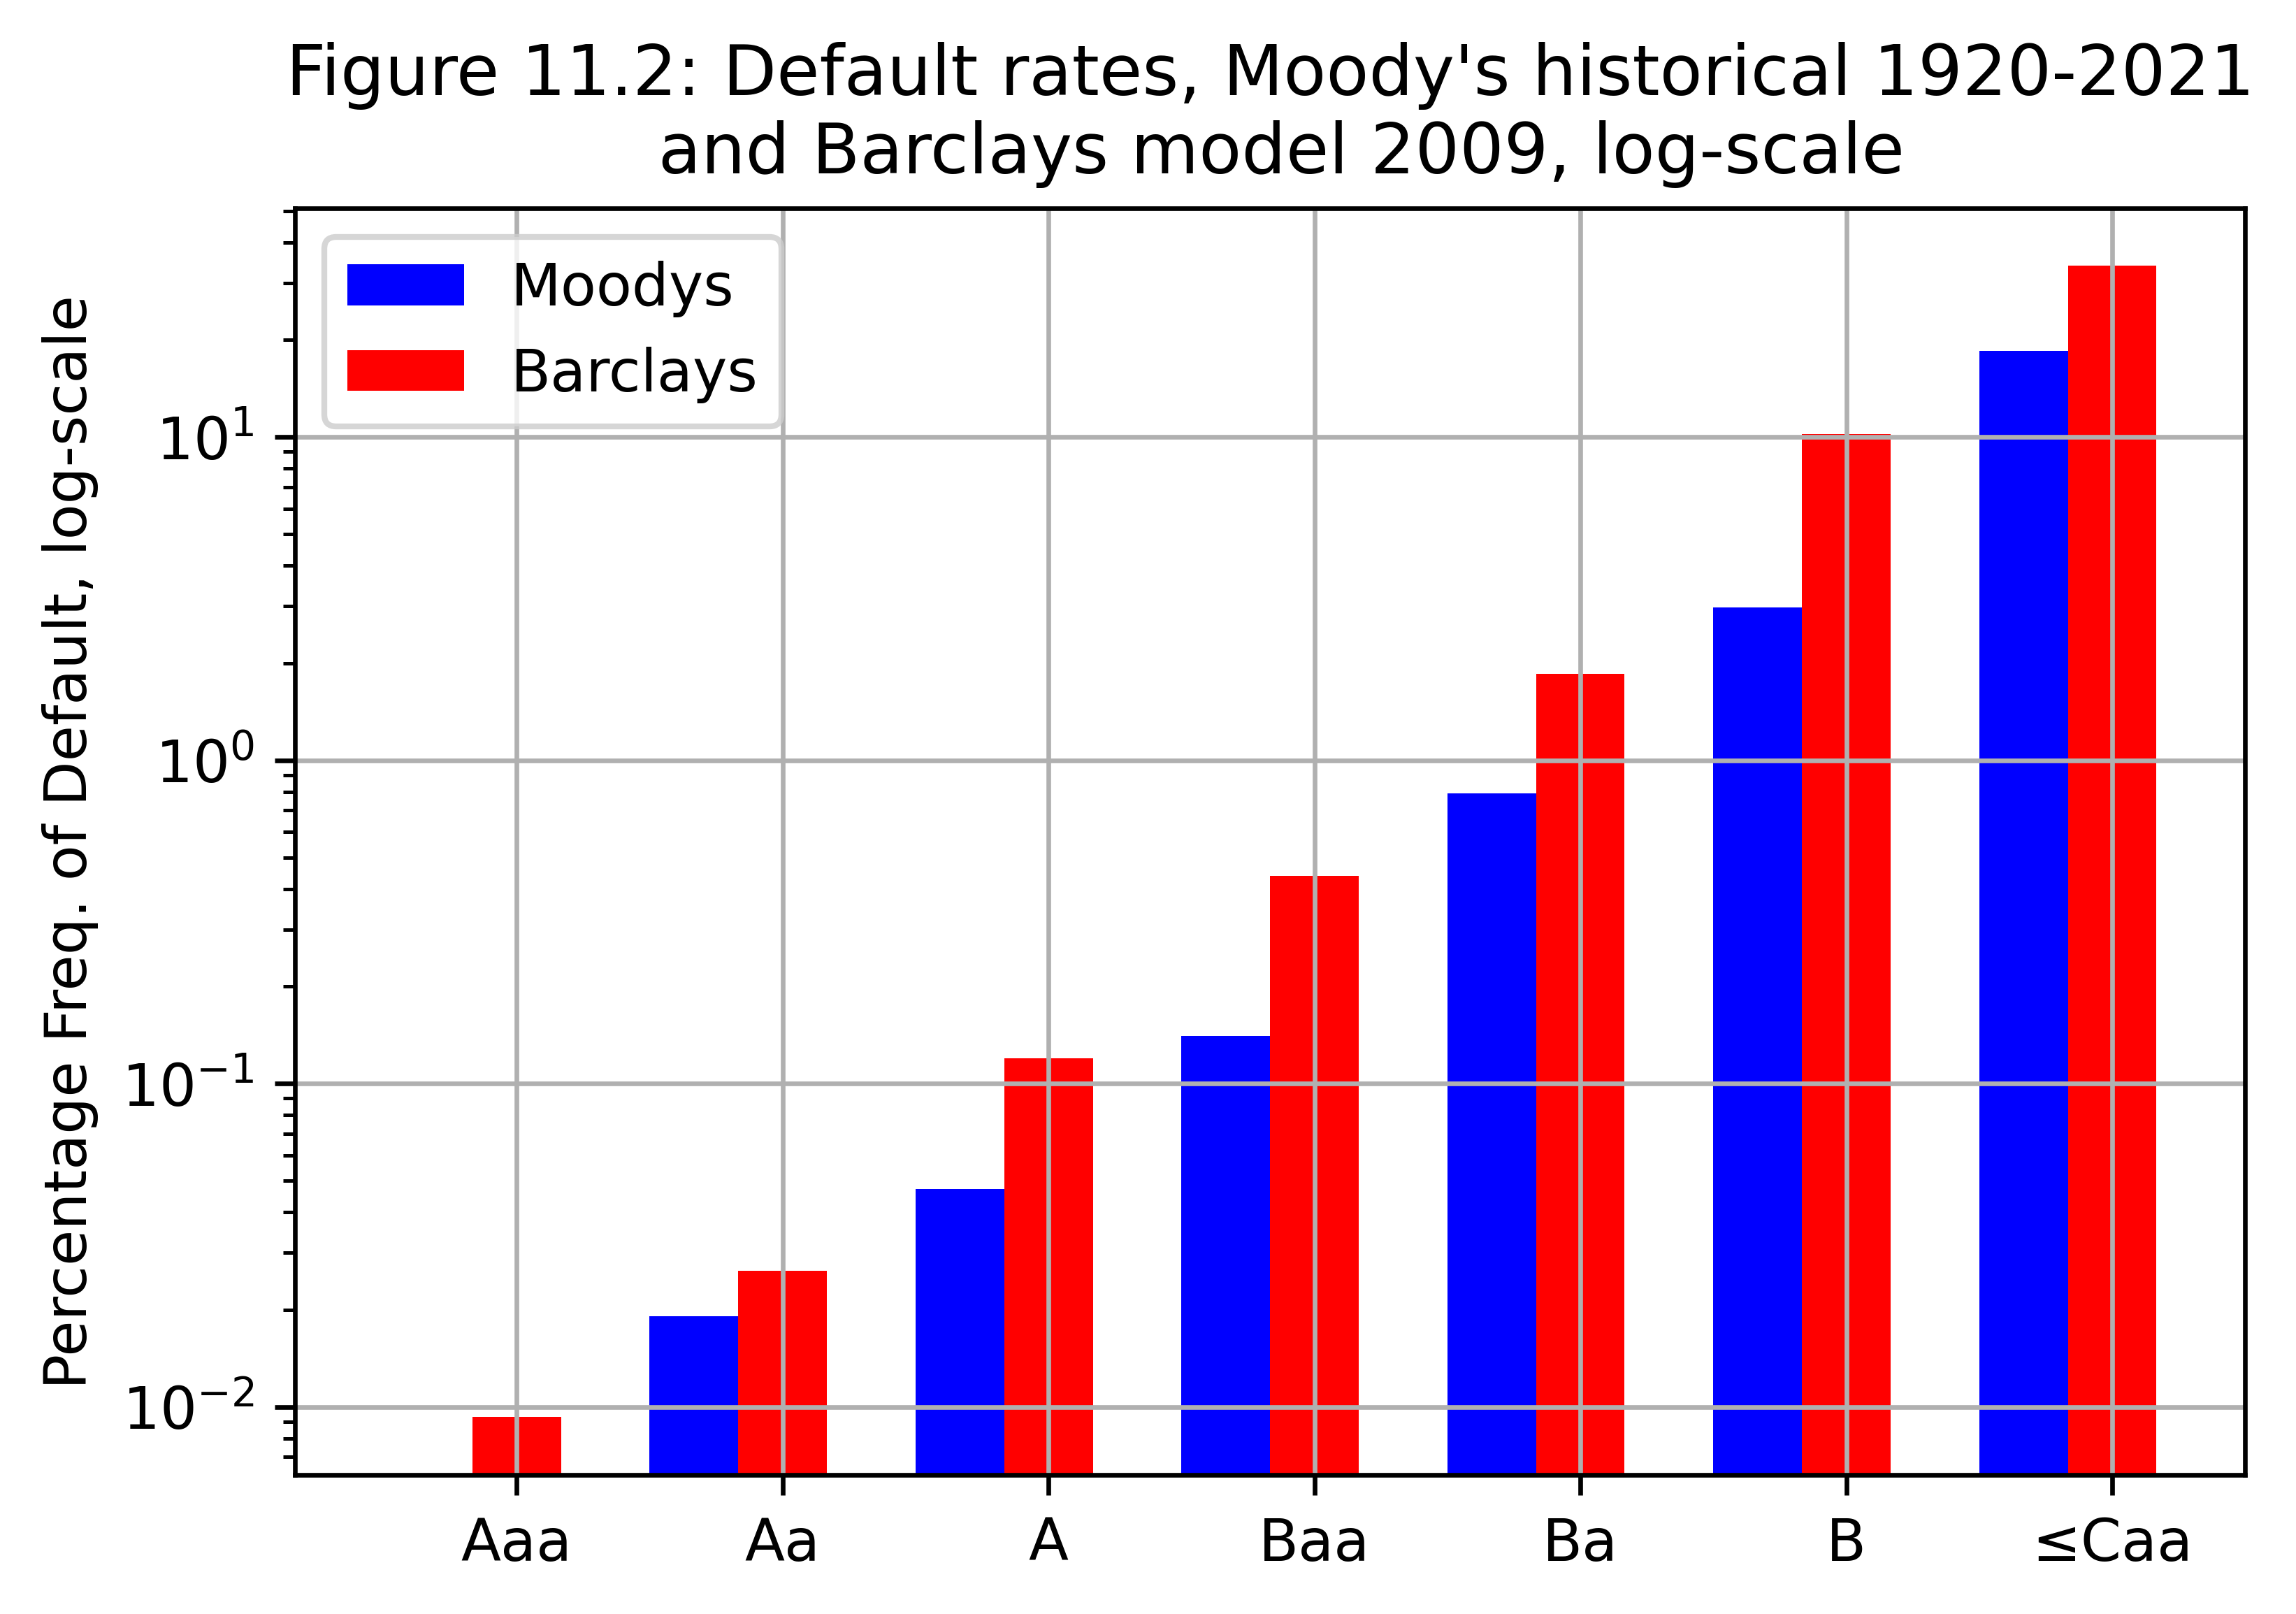

In [8]:
#Code Segment 11.5
#Data from Moody's Corporate Default and Recovery Rates,
#1920-2021 Exhibit 33 (1-year)
#and Barclays Capital,
#“The Corporate Default Probability Model,” April 2009
#ratings=['AAA','AA','A','BBB','BB','B','≤CCC']
edf2009=[.0093,.0264,.1198,.4393,1.852,10.22,33.904]
indices = [1,2,3,4,5,6,7]
#Calculate optimal width
width = np.min(np.diff(indices))/3

migrations=pd.read_excel(moodys_default_filename, sheet_name = 'Ex33', skiprows = 2, engine = "openpyxl")

ratings=list(migrations.columns[1:-3])   #Labels for ratings
moodys=np.array(migrations["Def"].iloc[:-1])
#average C's
moodys[-1]=(moodys[-1]+migrations["Def"].iloc[-1])/2.
ratings[-1]="≤"+ratings[-1]
moodys=np.multiply(moodys,100.)  #scale so that 1 means 1%

fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(indices-width,moodys,width,color='b',label='Moodys')
ax.bar(indices,edf2009,width,color='r',label='Barclays')
plt.grid()
plt.xticks(indices,ratings)
plt.yscale('log')
plt.ylabel('Percentage Freq. of Default, log-scale')
plt.legend()
str_title="Figure 11.2: Default rates, Moody's historical "+ default_date_range
str_title+="\n and Barclays model 2009, log-scale"
plt.title(str_title)
plt.show()

## Code segment 11.6
Table 11.6 in Section 11.2.3

In [9]:
#Code Segment 11.6
#Source: https://www.spglobal.com/ratings/en/research/
#articles/220504-default-transition-and-recovery-2021-
#annual-global-sovereign-default-and-rating-transition-study-12350530
#Table 17
import pandas as pd
sandp_default_filename = "SandP global credit 2021.xlsx"

sandp_date_range = pd.read_excel(sandp_default_filename, \
        sheet_name='Sov Table 17', nrows=1, engine="openpyxl") 

sandp_recent_date_range = sandp_date_range.iloc[0][0][-10:-1]

#Get table
sandp_cumulative_rates = pd.read_excel(sandp_default_filename, \
        sheet_name='Sov Table 17', skiprows=2, engine="openpyxl")

#Display table
print("Table 11.6: Standard and Poors's Average Sovereign Foreign Currency", \
      "\n Cumulative Default Rates (Percents, 1.0=1%) By Letter Rating, "+sandp_recent_date_range)
sandp_cumulative_rates

Table 11.6: Standard and Poors's Average Sovereign Foreign Currency 
 Cumulative Default Rates (Percents, 1.0=1%) By Letter Rating, 1975-2021


,Rating/Years,AAA,AA,A,BBB,BB,B,CCC/C,Investment-grade,Speculative-grade,All rated
0,1,0,0,0.00,0.00,0.38,2.42,37.50,0.00,3.14,1.18
1,2,0,0,0.00,0.41,1.37,6.12,44.20,0.10,5.77,2.23
2,3,0,0,0.23,1.07,1.98,9.54,51.48,0.31,8.09,3.22
3,4,0,0,0.72,1.53,2.61,12.65,54.03,0.53,10.07,4.09
4,5,0,0,1.23,2.02,3.94,15.38,57.09,0.76,12.17,5.00
5,6,0,0,1.76,2.55,5.34,17.70,63.22,1.00,14.18,5.88
6,7,0,0,2.33,3.11,6.82,20.21,66.57,1.25,16.23,6.76
7,8,0,0,2.92,3.41,8.63,22.69,66.57,1.45,18.28,7.61
8,9,0,0,3.53,3.74,10.01,24.58,66.57,1.65,19.84,8.28
9,10,0,0,4.18,4.10,10.89,26.34,66.57,1.87,21.11,8.85


## Code segment 11.7
Figure 11.3 in Section 11.2.4

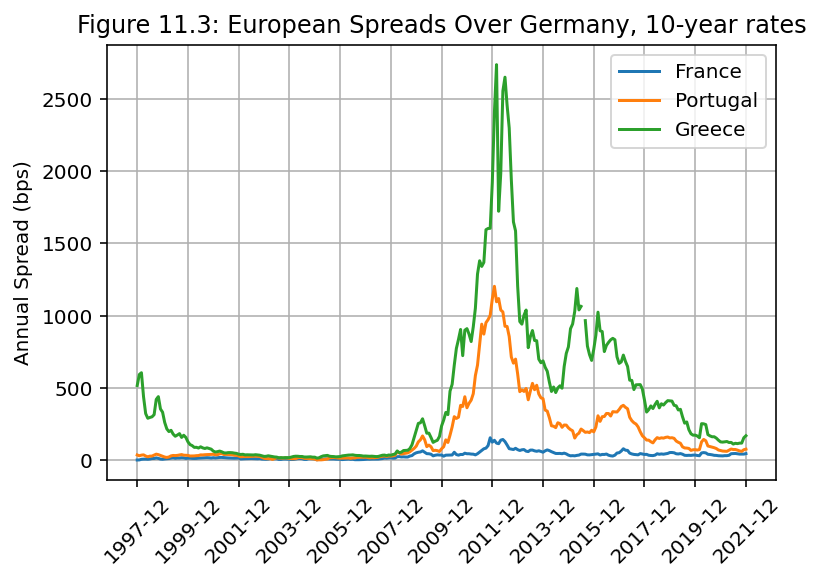

Ending values (2021-12-31) of spreads over Germany in bps/year
France  43.4
Portugal  74.4
Greece  167.4


In [10]:
#Code Segment 11.7
%matplotlib inline
import qrpm_funcs as qf
import matplotlib.pyplot as plt
#Get European rates - show spreads

lastday=qf.LastYearEnd()

seriesnames=['IRLTLT01DEM156N','IRLTLT01FRM156N','IRLTLT01PTM156N','IRLTLT01GRM156N']
shortnames=['France','Portugal','Greece']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,startdate='1997-12-31',enddate=lastday)
nobs=len(cdates)
x=range(nobs)
for i in range(len(shortnames)):
    plt.plot(x,[(y[i+1]-y[0])*100 for y in ratematrix],label=shortnames[i])

plt.ylabel("Annual Spread (bps)")
stride=24
plt.xticks(range(0,nobs,stride),[dt[:7] for dt in cdates[::stride]],rotation=45)
plt.legend()
plt.grid()
plt.title("Figure 11.3: European Spreads Over Germany, 10-year rates")
plt.show();

print("Ending values ("+lastday+") of spreads over Germany in bps/year")
for i in range(len(shortnames)):
    diff=np.multiply(ratematrix[-1][i+1]-ratematrix[-1][0],100.)
    print(shortnames[i]," %4.1f" % diff)

## Code segment 11.8
Recovery rates in Section 11.3

In [13]:
#Code Segment 11.8
#Data from Moody's Corporate Default and Recovery Rates,
#1920-2021 Exhibit 29 (5-year)
recoveries=pd.read_excel(moodys_default_filename, sheet_name = 'Ex29', engine = "openpyxl")
first_column_name = recoveries.columns[0]
recovery_date_range = first_column_name[-10:-1]   #Extract this table's date range
ig_recovery = np.multiply(100.,float(recoveries[recoveries[first_column_name]=="IG"]["Unnamed: 5"].iloc[0]))
print(recovery_date_range+" Investment Grade Average 5-Year Recovery: %.2f percent" % ig_recovery)
sg_recovery = np.multiply(100.,float(recoveries[recoveries[first_column_name]=="SG"]["Unnamed: 5"].iloc[0]))
print(recovery_date_range+" Speculative Grade Average 5-Year Recovery: %.2f percent" % sg_recovery)

1983-2021 Investment Grade Average 5-Year Recovery: 44.64 percent
1983-2021 Speculative Grade Average 5-Year Recovery: 38.70 percent


## Code segment 11.9
Rough loss calculations in Section 11.3

In [12]:
#Code Segment 11.9
#Rough calculation of loss rates. Note slightly different time periods.
ig_rough_loss_rate = (100. - ig_recovery) * ig_default_rate_since_1983
print(recovery_date_range+" Investment Grade Rough Annual Loss Rate: %.2f basis points per year" % ig_rough_loss_rate)
sg_rough_loss_rate = (100. - sg_recovery) * sg_default_rate_since_1983
print(recovery_date_range+" Speculative Grade Rough Annual Loss Rate: %.2f basis points per year" % sg_rough_loss_rate)

1983-2021 Investment Grade Rough Annual Loss Rate: 4.43 basis points per year
1983-2021 Speculative Grade Rough Annual Loss Rate: 263.76 basis points per year


## Code segment 11.10
Moodys loss rates in Section 11.3

In [13]:
#Code Segment 11.10
loss_rates = pd.read_excel(moodys_default_filename, sheet_name = 'Ex30', skiprows = 2, engine = "openpyxl")
ig_average_loss_rate = np.multiply(loss_rates["IG"].mean(),10000.)
print(recovery_date_range+" Investment Grade Average Annual Loss Rate: %.2f basis points per year" % ig_average_loss_rate)
sg_average_loss_rate = np.multiply(loss_rates["SG"].mean(),10000.)
print(recovery_date_range+" Speculative Grade Average Annual Loss Rate: %.2f basis points per year" % sg_average_loss_rate)

1983-2021 Investment Grade Average Annual Loss Rate: 4.97 basis points per year
1983-2021 Speculative Grade Average Annual Loss Rate: 253.43 basis points per year


## Code segment 11.11
Figure 11.4 in Section 11.3

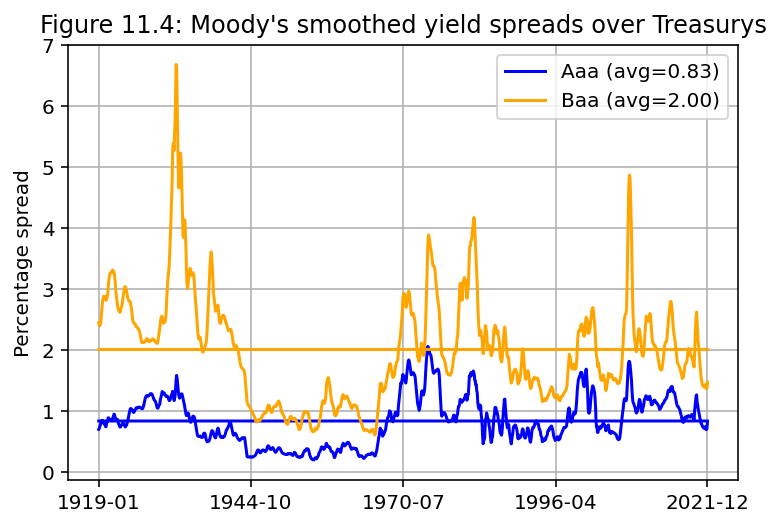

Spread and Treasury data starts 1919-01
Aaa/Baa level correlation: 0.73862
Aaa/Tsy difference correlation: -0.36996
Baa/Tsy difference correlation: -0.24246
Aaa/Baa difference correlation: 0.67662

Aaa mean since 1983: 0.9115362211858987
Baa mean since 1983: 1.911852460502137


In [14]:
#Code Segment 11.11
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import pandas as pd
import qrpm_funcs as qf
#Get Moody's AAA and BBB yields from FRED.
#Splice together long-term US Treasury rate series,
#and subtract them off to form credit spreads.
#Display and correlate with VIX

def smooth_series(series,back):
#Smooth a time series by averaging "back" observations
    cum_series=np.cumsum(series)
    #Take averages
    smoo=(cum_series[back:]-cum_series[:-back])/back
    #Tack on stub at end
    return(np.concatenate((smoo, series[-back:]), axis=0))

lastday=qf.LastYearEnd()
seriesnames=['AAA','BAA','M1333AUSM156NNBR', \
             'LTGOVTBD','IRLTCT01USM156N']
cdates,ratematrix=qf.GetFREDMatrix(seriesnames,
            enddate=lastday)

#Splice together the three overlapping long-term
#Treasury series. They agree where they overlap
longterm=[]
for t in range(len(ratematrix)):
    #Take average of non-nan values of the overlapping series
    num_non_nan=np.count_nonzero(~np.isnan(ratematrix[t][2:5]))
    if num_non_nan==0:
        longterm.append(longterm[-1])   #propagate the previous value
    else:
        longterm.append(np.nansum(ratematrix[t][2:5])/num_non_nan)

n=len(longterm)

#time series of differences is rough - smooth it
#Roughness probably comes from different timings of
#observations of corporate yields and Treasurys
back=5  #Will take rolling back-month averages
aaa=[x[0]-y for (x,y) in zip(ratematrix,longterm)]
aaamean=np.mean(aaa)
aaa=smooth_series(aaa, back)

bbb=[x[1]-y for (x,y) in zip(ratematrix,longterm)]
bbbmean=np.mean(bbb)
bbb=smooth_series(bbb, back)

#Apply same transform to Treasurys for correlation
tsy=smooth_series(longterm, back)

#Show spread time series and straight line for averages
alabel='Aaa (avg=%1.2f' % aaamean
alabel+=')'
plt.plot(range(n),aaa,label=alabel,color='blue')
plt.plot(range(n),[aaamean]*n,color='blue')
blabel='Baa (avg=%1.2f' % bbbmean
blabel+=')'
plt.plot(range(n),bbb,label=blabel,color='orange')
plt.plot(range(n),[bbbmean]*n,color='orange')

plt.legend()
plt.grid()
stride=int((n+1)/4)
places=np.arange(0,n+stride,stride)
places[len(places)-1]=n-1
displaydates=[cdates[j][:7] for j in places]    
plt.ylabel("Percentage spread")
plt.xticks(places,displaydates)
plt.title("Figure 11.4: Moody's smoothed yield spreads over Treasurys")
plt.show();

ab_level=scipy.stats.pearsonr(aaa,bbb)[0]
at_diff=scipy.stats.pearsonr(np.diff(aaa),np.diff(tsy))[0]
bt_diff=scipy.stats.pearsonr(np.diff(bbb),np.diff(tsy))[0]
ab_diff=scipy.stats.pearsonr(np.diff(aaa),np.diff(bbb))[0]
print("Spread and Treasury data starts",cdates[0][:7])
print("Aaa/Baa level correlation: %.5f" % ab_level)
print("Aaa/Tsy difference correlation: %.5f" % at_diff)
print("Baa/Tsy difference correlation: %.5f" % bt_diff)
print("Aaa/Baa difference correlation: %.5f" % ab_diff)

print("\nAaa mean since 1983:",np.mean(aaa[cdates.index("1983-01-01"):]))
print("Baa mean since 1983:",np.mean(bbb[cdates.index("1983-01-01"):]))

## Code segment 11.12
Index returns and spreads in Section 11.3

In [15]:
#Code Segment 11.12
#Get total returns on IG, HY, and Treasury indices from FRED
from datetime import datetime, timedelta

seriesnames=['BAMLHYH0A0HYM2TRIV','BAMLCC0A0CMTRIV','DGS10']
xdates,xratematrix=qf.GetFREDMatrix(seriesnames,enddate=lastday)

#Put in dataframe
df_spreads = pd.DataFrame({'Date': pd.to_datetime(xdates), \
                           'HY': [row[0] for row in xratematrix], \
                           'IG': [row[1] for row in xratematrix], \
                           'Tsy': [row[2] for row in xratematrix]})
#Change to monthly and get rid of NAs
df_spreads=df_spreads.resample('M', on='Date').last().dropna()

#Convert Treasury rates to index levels. Only need final value of bond_idx
#Assume rates given are for 10-year par bond paying semiannually
bond_idx=[100.]*len(df_spreads)
T20=20   #20 semiannual periods

oldrate=df_spreads['Tsy'].iloc[0]/200.   #Semiannual rate
for i in range(len(df_spreads)-1):
    #Use formula (3.7) to get duration of par bond
    #Coupon and discount rate are from the old period
    y=1/(1+oldrate)
    #Duration is in half-years
    duration=(oldrate*y/(1-y)**2)*(1-y**T20-T20*(1-y)*y**T20)+T20*y**T20
    newrate=df_spreads['Tsy'].iloc[i+1]/200.
    #Return for the month
    bond_return=oldrate/6-duration*(newrate-oldrate)
    #Compute index levels for compatibility
    bond_idx[i+1]=bond_idx[i]*(1.+bond_return)
    oldrate=newrate

df_spreads['BondIndex'] = bond_idx   #Tack on the index-ized 10-year rates
    
#Format start and end dates and get elapsed time in years
dt_start = datetime.strftime(df_spreads.index[0],"%Y-%m-%d")
dt_end = datetime.strftime(df_spreads.index[-1],"%Y-%m-%d")
years=(df_spreads.index[-1]-df_spreads.index[0])/(timedelta(days=1)*365.25)

#Get annualized rates of return
tsy_annual=(df_spreads['BondIndex'].iloc[-1]/df_spreads['BondIndex'].iloc[0])**(1/years)-1.
ig_annual=(df_spreads['IG'].iloc[-1]/df_spreads['IG'].iloc[0])**(1/years)-1.
hy_annual=(df_spreads['HY'].iloc[-1]/df_spreads['HY'].iloc[0])**(1/years)-1.

#Get vols of log-returns of Tsy, IG, and HY
df_spreads['tsy_log_ret'] = np.log(df_spreads['BondIndex']).diff()
df_spreads['IG_log_ret'] = np.log(df_spreads['IG']).diff()
df_spreads['HY_log_ret'] = np.log(df_spreads['HY']).diff()

str_range="Annualized rates of return from "
str_range+=dt_start + " to " + dt_end + " (%4.1f" % years + " years)"

print(str_range)
print("US Treasury 10-year: %5.4f, Vol: %5.4f" % \
      (tsy_annual,np.sqrt(12.)*df_spreads['tsy_log_ret'].std()))
print("US Corp Master (IG): %5.4f, Vol: %5.4f" % \
      (ig_annual,np.sqrt(12.)*df_spreads['IG_log_ret'].std()))
print("  (spread over Tsy): %5.4f" % (ig_annual-tsy_annual))
print("US HY Master 2     : %5.4f, Vol: %5.4f" % \
      (hy_annual,np.sqrt(12.)*df_spreads['HY_log_ret'].std()))
print("  (spread over Tsy): %5.4f" % (hy_annual-tsy_annual))

Annualized rates of return from 1986-08-31 to 2021-12-31 (35.3 years)
US Treasury 10-year: 0.0568, Vol: 0.0740
US Corp Master (IG): 0.0686, Vol: 0.0527
  (spread over Tsy): 0.0118
US HY Master 2     : 0.0812, Vol: 0.0813
  (spread over Tsy): 0.0244


## Code segment 11.13
Figure 11.5 in Section 11.4.1

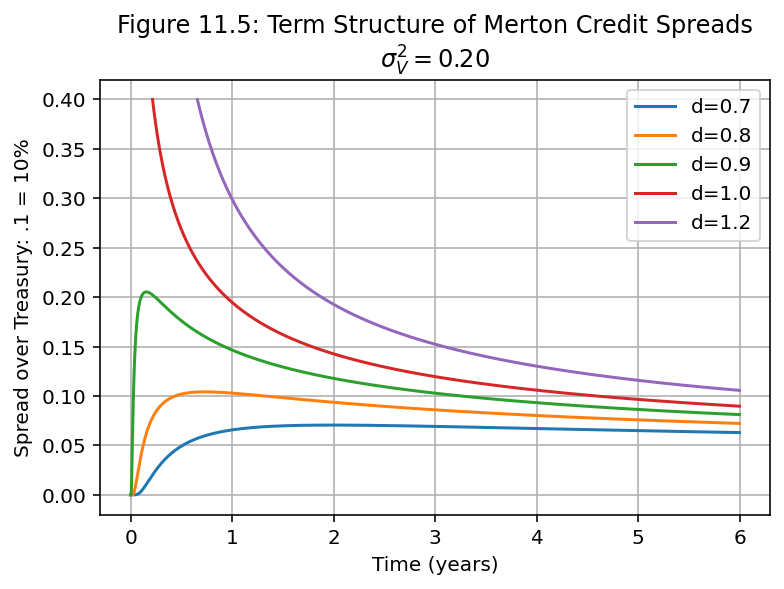

In [16]:
#Code Segment 11.13
import scipy.stats as spst
#Graph sample term structure of credit spreads

def bsm_d1_2var(sig_sqrttime,dratio):
    #Black-Scholes-Merton d1
    return((-np.log(dratio)+(sig_sqrttime**2/2))/sig_sqrttime)
#End bsm_d1_2var

def bsm_d2_2var(sig_sqrttime,dratio):
    #Black-Scholes-Merton d2
    return(bsm_d1_2var(sig_sqrttime,dratio)-sig_sqrttime)
#End bsm_d2_2var

def merton_credit_spread(sigma,T,dratio):
    #Merton credit spread (see 11.13, equivalent to Merton (14))
    sigsqt=sigma*np.sqrt(T)
    d_1=bsm_d1_2var(sigsqt,dratio)
    d_2=bsm_d2_2var(sigsqt,dratio)
    log_arg=spst.norm.cdf(-d_1)/dratio+spst.norm.cdf(d_2)
    return(-np.log(log_arg)/T)
#End merton_credit_spread

sigma=np.sqrt(.2)
x=np.arange(.001,6.,.001)
for dratio in [.7,.8,.9,1.0,1.2]:
    y=[merton_credit_spread(sigma,t,dratio) for t in x]
    y2 = np.ma.masked_greater_equal(y, 0.4)
    plt.plot(x,y2,label="d="+str(dratio))

plt.legend()
plt.grid()
plt.xlabel("Time (years)")
plt.ylabel("Spread over Treasury: .1 = 10%")
plt.title("Figure 11.5: Term Structure of Merton Credit Spreads" \
          +"\n$\sigma_V^2={sv2:.2f}$".format(sv2=sigma**2))
plt.show();

## Code segment 11.14
Figure 11.6 in Section 11.4.2
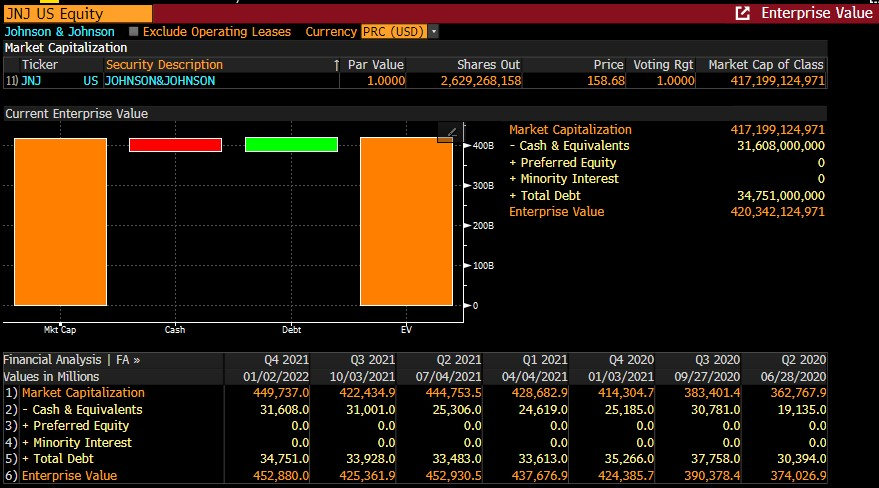

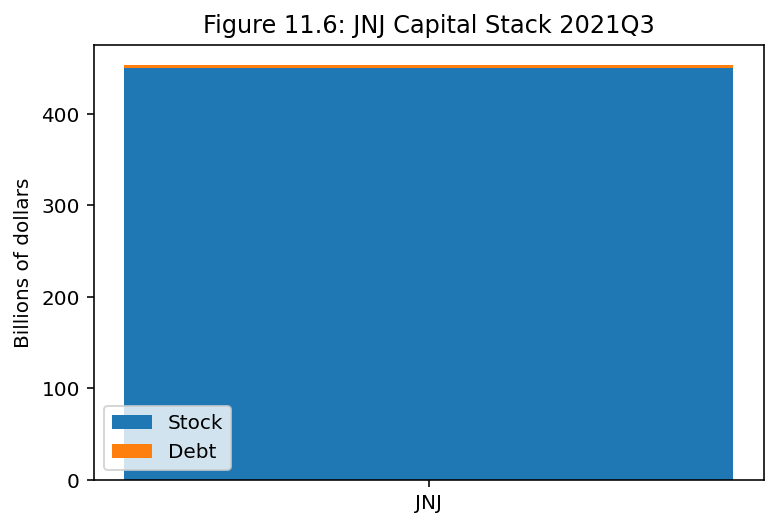

In [17]:
#Code Segment 11.14
#Draw capital stack for JNJ

def show_capital_stack(ticker,title,stock,par_debt):
    labels = [ticker]
    bottom_tranche = [stock]
    top_tranche = [par_debt]
    width = 0.35

    plt.bar(labels, bottom_tranche, width, label='Stock')
    plt.bar(labels, top_tranche, width, bottom=bottom_tranche, label='Debt')

    plt.ylabel('Billions of dollars')
    plt.title(title)
    plt.legend()

    plt.show();
    
#Fourth quarter 2021
date_JNJ="2021Q3"
S_JNJ=449.737
D_par_JNJ=34.751-31.608
title="Figure 11.6: JNJ Capital Stack "+date_JNJ
show_capital_stack('JNJ',title,S_JNJ,D_par_JNJ)

## Code segment 11.15
JNJ distance to default calculations in Section 11.4.2

In [18]:
#Code Segment 11.15
#Distance to default, d1, and black-scholes calculation
#For JNJ

def bsm_d1(underlying,strike,time,rfrate,sigma):
    #Black-Scholes-Merton d1
    return(bsm_d1_2var(sigma*np.sqrt(time),strike*np.exp(-rfrate*time)/underlying))
#End bsm_d1

def bsm_d2(underlying,strike,time,rfrate,sigma):
    #Black-Scholes-Merton d2=d_def
    return(bsm_d2_2var(sigma*np.sqrt(time),strike*np.exp(-rfrate*time)/underlying))
#End bsm_d2

def bsm(underlying,strike,time,rfrate,sigma):
    #Black-Scholes-Merton call price
    d_1=bsm_d1(underlying,strike,time,rfrate,sigma)
    d_2=bsm_d2(underlying,strike,time,rfrate,sigma)
    call_price=underlying*spst.norm.cdf(d_1)- \
        np.exp(-rfrate*time)*strike*spst.norm.cdf(d_2)
    return(call_price)
#End bsm

def show_merton_computations(name,S,D_par,sigma_S,r,T):
    #Rough calculation for enterprise value - see text below for 
    #better estimate
    V=S+D_par
    
    print('Ratios for %s:'% name)
    print('     D/V:',D_par/V)
    print('     D/S:',D_par/S)
    print('     S/V:',S/V)
    print(' ln(V/D):',np.log(V/D_par))

    #rough calculation for enterprise volatility - scale stock
    #volatility by S/V
    sigma_V = (S/V)*sigma_S
    print('\nComputations for %s:'% name)
    print('    S/V-scaled enterprise vol:',sigma_V)
    print('Risk-neutral growth rate r-sig^2/2:',r-sigma_V**2/2)

    #Risk-neutral distance to default
    d_def=bsm_d2(V,D_par,T,r,sigma_V)
    print("Risk-neutral distance to default:",d_def)
    print("   Default probability N(-d_def):",spst.norm.cdf(-d_def))

    #Black-Scholes
    Call_V=bsm(V,D_par,T,r,sigma_V)
    Put_V = np.exp(-r*T)*D_par-V+Call_V
    print("\nDebt components for %s:"% name)
    print("            Par value of debt:",D_par)
    print("       Time value of par debt:",D_par*(1-np.exp(-r*T)))
    print("         Value of default put:",Put_V)
    print(" Current market value of debt:",V-Call_V)
#End show_merton_computations

## Get 10-year Treasury rate at yearend
lastday=qf.LastYearEnd()
seriesnames=['DGS10']
tydates,tymatrix=qf.GetFREDMatrix(seriesnames,startdate=lastday,enddate=lastday)
ten_year_tsy=tymatrix[0][0]/100.

#Data for JNJ; assume (counterfactually) 10-year debt for illustrative purposes
#2021Q4 data from Bloomberg EV
#From 2021-12-31 Bloomberg HIVG
sigma_S_JNJ=.17255
show_merton_computations('JNJ',S_JNJ,D_par_JNJ,sigma_S_JNJ,ten_year_tsy,10)

print("\nTable 11.3 10-year Aaa default  * (1-IG-recovery) * D_par:",cumulative_rates["Aaa"][10]*(100.-ig_recovery)*D_par_JNJ/100.)

Ratios for JNJ:
     D/V: 0.006940028263557669
     D/S: 0.006988528851306424
     S/V: 0.9930599717364423
 ln(V/D): 4.970449431912975

Computations for JNJ:
    S/V-scaled enterprise vol: 0.17135249812312314
Risk-neutral growth rate r-sig^2/2: 0.0005191606934825399
Risk-neutral distance to default: 9.18245060591977
   Default probability N(-d_def): 2.1069519756909534e-20

Debt components for JNJ:
            Par value of debt: 3.142999999999997
       Time value of par debt: 0.44319983363064863
         Value of default put: 0.0
 Current market value of debt: 2.699800166369357

Table 11.3 10-year Aaa default  * (1-IG-recovery) * D_par: 0.002206987186031947


## Code segment 11.16
Iterated JNJ distance to default calculations in Section 11.4.3

In [19]:
#Code Segment 11.16
#Iterative solution of sigma-v and V for JNJ
#Using (11.7) and (11.16)
import numpy as np
import scipy.stats as spst

def form11_16(stock,value,sigma_stock,d_1):
    #Formula 11.16 for enterprise volatility
    return(stock*sigma_stock/(spst.norm.cdf(d_1)*value))

def iter_enterprise(name,stock,d_par,sigma_stock,rfree,time):
    #Search for V that solves S(=observed stock price)=bsm(V, sigmaV)
    #where sigmaV is according to 11.16
    #Bracket solution for binary search
    V0=d_par+stock/2 #Starting guess
    Vsmall, Vbig = 0, 2*V0
    threshhold = 10**(-8)
    count = 0
    while count < 200:
        #Try enterprise value in brackets
        V=(Vsmall+Vbig)/2
        d1=bsm_d1(V,d_par,time,rfree,sigma_stock)
        sigma_V=form11_16(stock,V,sigma_stock,d1)
        new_S=bsm(V,d_par,time,rfree,sigma_V)
        #Which way to go for binary search?
        if new_S-stock > threshhold:
            Vbig = V
        elif stock-new_S > threshhold:
            Vsmall = V
        else:
            break
        count+=1

    print('%s enterprise value at par:     %5.3f' % (name,stock+d_par))
    print('%s enterprise value at market:  %5.3f' % (name,V))
    print('%s enterprise volatility:       %5.3f' % (name,sigma_V))

    print('\n                                 D_par:',d_par)
    print('  Market value of debt (D_par-Put=V-S):',V-stock)
    print('                Time value of par debt:',d_par*(1-np.exp(-rfree*time)))
    print('             Implied default put value:',d_par*np.exp(-rfree*time)-V+stock)
    print('Default put value as a fraction of par:',np.exp(-rfree*time)-(V-stock)/d_par)
    print('                       d_1 at solution:',d1)
    print('(%d iterations for accuracy %e' % (count,threshhold)+')')
#Done with iter_enterprise    
    
#For JNJ
iter_enterprise('JNJ',S_JNJ,D_par_JNJ,sigma_S_JNJ,ten_year_tsy,10)

JNJ enterprise value at par:     452.880
JNJ enterprise value at market:  452.437
JNJ enterprise volatility:       0.172

                                 D_par: 3.142999999999997
  Market value of debt (D_par-Put=V-S): 2.6998001632180717
                Time value of par debt: 0.44319983363064863
             Implied default put value: 3.1512854548054747e-09
Default put value as a fraction of par: 1.0026334207324794e-09
                       d_1 at solution: 9.658807077790133
(34 iterations for accuracy 1.000000e-08)


## Code segment 11.17
Figure 11.7 in Section 11.4.3
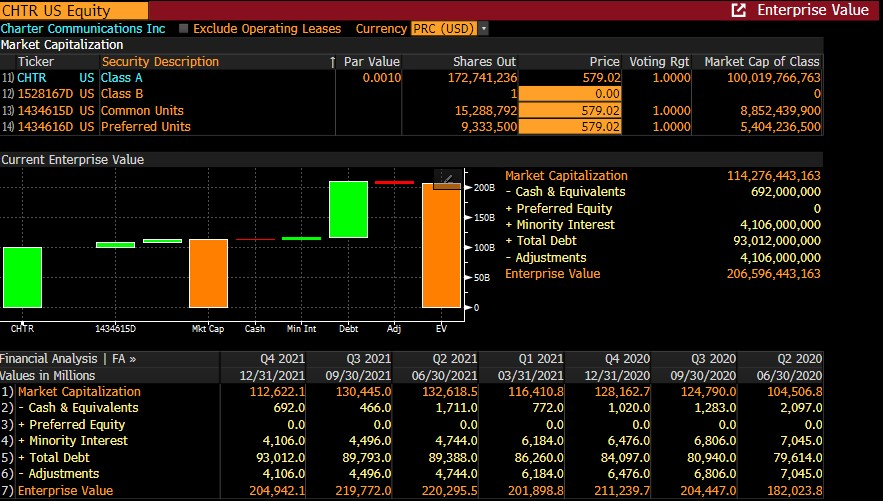

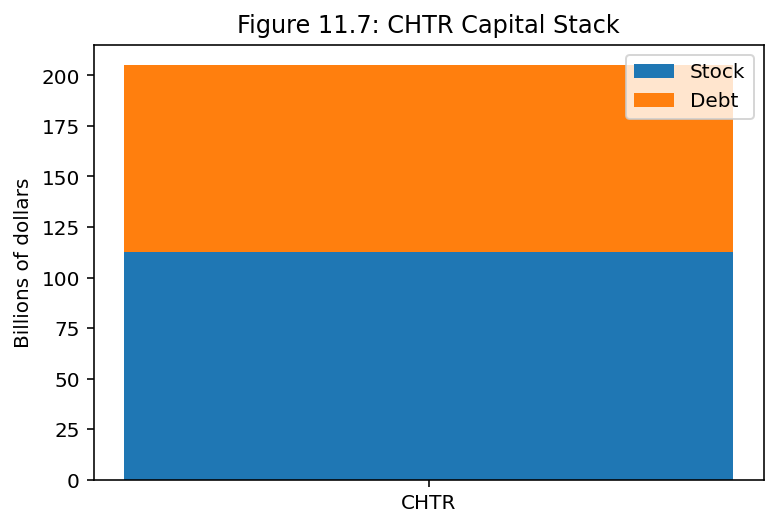

In [20]:
#Code Segment 11.17
#Fourth quarter 2021
date_CHTR="2021Q4"
S_CHTR=112.622
D_par_CHTR=204.942-S_CHTR
title="Figure 11.7: CHTR Capital Stack"
show_capital_stack('CHTR',title,S_CHTR,D_par_CHTR)

## Code segment 11.18
Iterated CHTR distance to default calculations in Section 11.4.3

In [21]:
#Code Segment 11.18
#Data for CHTR; assume (counterfactually) 10-year debt for illustrative purposes
sigma_S_CHTR=.29561   #From Bloomberg HIVG
iter_enterprise('CHTR',S_CHTR,D_par_CHTR,sigma_S_CHTR,ten_year_tsy,10)
#Bonds used for YAS: 4.75 of 2/1/32 on February 24, 2022: OAS of 351

print("\nTable 11.3 10-year Ba default  * (1-SG-recovery) * D_par:",cumulative_rates["Ba"][10]*(100.-sg_recovery)*D_par_CHTR/100.)

CHTR enterprise value at par:     204.942
CHTR enterprise value at market:  189.526
CHTR enterprise volatility:       0.191

                                 D_par: 92.32000000000001
  Market value of debt (D_par-Put=V-S): 76.90437553599988
                Time value of par debt: 13.018201921979486
             Implied default put value: 2.3974225420206494
Default put value as a fraction of par: 0.02596861505654946
                       d_1 at solution: 1.3994357073170307
(31 iterations for accuracy 1.000000e-08)

Table 11.3 10-year Ba default  * (1-SG-recovery) * D_par: 8.17512764245547


## Code segment 11.19
VIX correlations with spreads in Section 11.5

In [22]:
#Code Segment 11.19
#Get VIX index (which is daily)
vxnames=['VXOCLS','VIXCLS']
vxdates,vxmatrix=qf.GetFREDMatrix(vxnames,enddate=lastday)

#Drop double nans
combined_dates=[]
combined_vix=[]
for i in range(len(vxdates)):
    if not all(np.isnan(vxmatrix[i])):
        combined_dates.append(vxdates[i])
        combined_vix.append(vxmatrix[i][1])   #Use VIX but switch to VXO if not available
        if np.isnan(combined_vix[-1]): combined_vix[-1]=vxmatrix[i][0]

#Find monthends
monthend_dates=[]
monthend_vix=[]
for i in range(1,len(combined_dates)+1):
    usenextguy = (i==len(combined_dates))  #last datapoint is a monthend
    if not usenextguy:
        usenextguy = (combined_dates[i-1].split('-')[1]!=combined_dates[i].split('-')[1])
    if usenextguy:
        monthend_dates.append(combined_dates[i-1])
        monthend_vix.append(combined_vix[i-1])

#cdates and ratematrix from Figure 11.4
#find out start of VIX data in bond yield data
#Monthly dates for bond yields look like
#YYYY-MM-01 but they're really the last business day
vixstart=cdates.index(vxdates[0][:8]+'01')
rates_and_vix=[ratematrix[vixstart+i]+[monthend_vix[i]] for i in range(len(monthend_vix))]

#Smooth VIX
vix=[x[5] for x in rates_and_vix]
vix2=np.cumsum(vix)
vix3=(vix2[back:]-vix2[:-back])/back
vix=np.concatenate((vix3, vix[-back:]), axis=0)

#Correlate smoothed spreads with VIX
av_level,av_pvalue=scipy.stats.pearsonr(vix,aaa[vixstart:])
bv_level,bv_pvalue=scipy.stats.pearsonr(vix,bbb[vixstart:])
av_diff,avd_pvalue=scipy.stats.pearsonr(np.diff(vix),np.diff(aaa[vixstart:]))
bv_diff,bvd_pvalue=scipy.stats.pearsonr(np.diff(vix),np.diff(bbb[vixstart:]))
print("VIX data starts",cdates[vixstart][:7],"ends",cdates[-1][:7]+";",len(vix),"periods")
print("Aaa/VIX level correlation: %.5f" % av_level)
print("Baa/VIX level correlation: %.5f" % bv_level)
print("Aaa/VIX difference correlation: %.5f" % av_diff)
print("Baa/VIX difference correlation: %.5f" % bv_diff)
high_pvalue=max(av_pvalue,bv_pvalue,avd_pvalue,bvd_pvalue)
print("Reject null hypothesis of zero correlation with\n"+ \
      "    probability at least one minus:",high_pvalue)

VIX data starts 1986-01 ends 2021-12; 432 periods
Aaa/VIX level correlation: 0.49461
Baa/VIX level correlation: 0.65096
Aaa/VIX difference correlation: 0.43444
Baa/VIX difference correlation: 0.47541
Reject null hypothesis of zero correlation with
    probability at least one minus: 2.870537133566692e-21


## Code segment 11.20
Figure 11.8 in Section 11.5

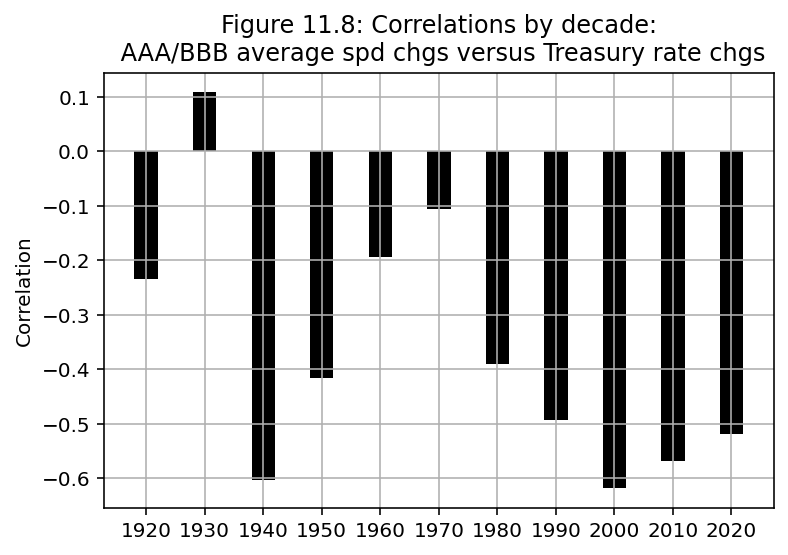

Spread and Treasury data starts 1919-01 ends 2021-12; periods: 1236
AAA/Tsy difference correlation: -0.36996 p-value: 2.3834590494290185e-41
BBB/Tsy difference correlation: -0.24246 p-value: 5.552512261805678e-18


In [23]:
#Code Segment 11.20
#Show correlations by decade rates/spreads

lastdecade=int(lastday[:3])
lastdecade*=10
decades=np.arange(1920,lastdecade+1,10)

decade_starts=[]
for d in decades:
    decade_string=str(d)+'-01-01'
    decade_starts.append(cdates.index(decade_string))
    
#Close out most recent decade
decade_starts.append(len(cdates))

decade_correlations=[]
for i,d in enumerate(decades):
    avgspd_decade=( \
        aaa[decade_starts[i]:decade_starts[i+1]]+ \
        bbb[decade_starts[i]:decade_starts[i+1]])/2
    tsy_decade=tsy[decade_starts[i]:decade_starts[i+1]]
    avgt_diff=scipy.stats.pearsonr(np.diff(avgspd_decade),np.diff(tsy_decade))[0]
    decade_correlations.append(avgt_diff)

#Display bar chart
indices=np.arange(len(decades))
width = 0.4
plt.bar(indices,decade_correlations,width,color='black')
plt.grid()
plt.xticks(indices,decades)
plt.ylabel("Correlation")
plt.title("Figure 11.8: Correlations by decade:\n AAA/BBB average spd chgs versus Treasury rate chgs")
plt.show();

at_diff,at_pvalue=scipy.stats.pearsonr(np.diff(aaa),np.diff(tsy))
bt_diff,bt_pvalue=scipy.stats.pearsonr(np.diff(bbb),np.diff(tsy))

print("Spread and Treasury data starts",cdates[0][:7],"ends",cdates[-1][:7]+";", \
     "periods:",len(cdates))
print("AAA/Tsy difference correlation: %.5f" % at_diff,"p-value:",at_pvalue)
print("BBB/Tsy difference correlation: %.5f" % bt_diff,"p-value:",bt_pvalue)